# <center> <b> Data Preprocessing </b> </center>

#### Data preprocessing is a critical step in the data analysis pipeline, essential for ensuring the quality, reliability, and usability of the dataset for subsequent analysis and modeling tasks. In this project, we undertake the task of designing and implementing a robust data preprocessing system aimed at addressing common challenges encountered in datasets, including missing values, outliers, inconsistent formatting, and noise.

#### The primary objective of this project is to develop a comprehensive data preprocessing system that effectively handles various data imperfections and prepares the dataset for machine learning applications. By performing meticulous data preprocessing, we aim to enhance the overall quality and reliability of the dataset, thereby improving the performance of machine learning models trained on the data.

## Step 1: Data Exploration

### 1.1 Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1.2 Load the dataset.

In [2]:
data = pd.read_csv("Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### 1.3 Data Analysis

In [3]:
#Display the first few rows of the dataset
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
#Display the last few rows of the dataset
data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [5]:
#Display concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
# Display statistical summary of the dataFram
data.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [7]:
#To check if there are any missing values in dataset
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

##### Company: There are 8 missing values in the "Company" column.
##### Age: There are 18 missing values in the "Age" column.
##### Salary: There are 24 missing values in the "Salary" column.
##### City: There are 14 missing values in the "City" column.
##### Country: There are 0 missing values in the "Country" column.
##### Gender: There are 0 missing values in the "Gender" column.

In [8]:
#To check if there are any missing values in dataset
data.notnull().sum()

Company    140
Age        130
Salary     124
Place      134
Country    148
Gender     148
dtype: int64

In [9]:
#To check if there are any duplicates in dataset
data.duplicated().sum()

4

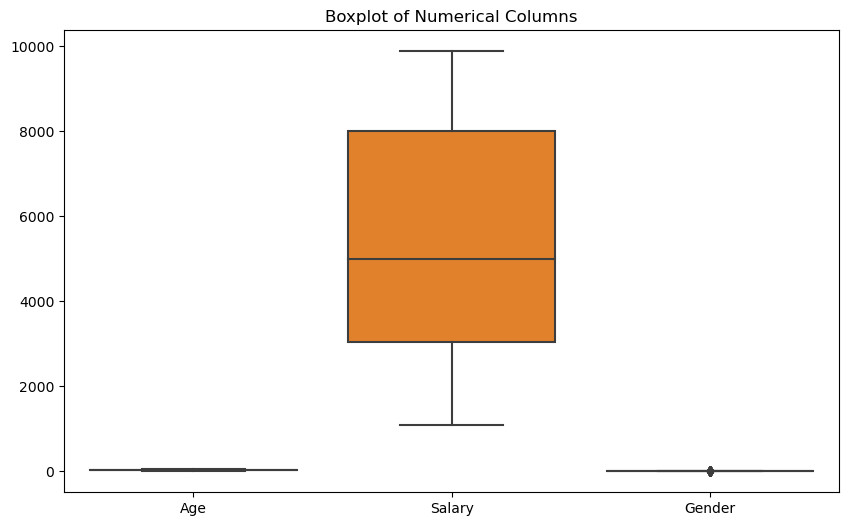

In [10]:
#Plot boxplot for all the numerical columns to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Columns')
plt.show()

C:\Users\Windows10\AppData\Local\Temp\ipykernel_37328\2895255376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


Text(0.5, 1.0, 'Distribution Plot of Salary')

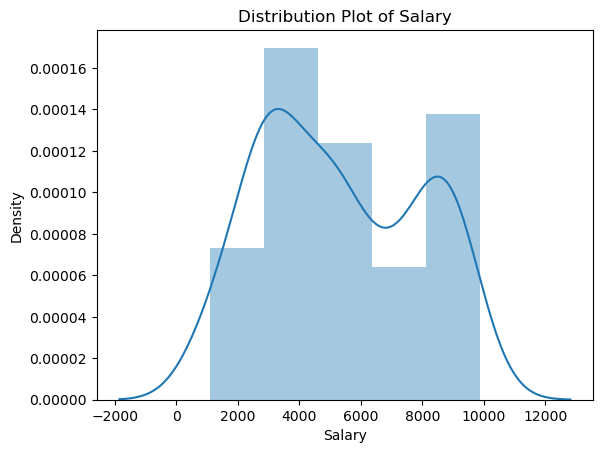

In [11]:
#plot distplot to understanding data distribution and identifying outliers
sns.distplot(data['Salary'])
plt.title('Distribution Plot of Salary')

### 1.4 Check for unique values and lengths in each feature.

In [12]:
# 1.3 Check for unique values and lengths in each feature.
unique_values = {col: (data[col].unique(), len(data[col].unique())) for col in data.columns}

print("Unique values in each feature:")
for col, (values, length) in unique_values.items():
    print(f"{col}: {length} - {values}")

Unique values in each feature:
Company: 7 - ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 30 - [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: 41 - [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: 12 - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 - ['India']
Gender: 2 - [0 1]


##### The dataset exhibits diversity in its features. The 'Company' column contains variations such as 'TCS' and 'Tata Consultancy Services', likely representing the same entity, along with 'Infosys' and 'Infosys Pvt Lmt', which may also refer to the same company. 'Age' ranges across 30 unique values, with some instances of 0, potentially outliers or data errors, necessitating conversion to NaN. Salary spans 41 unique values, with some missing entries. The 'Place' column encompasses 12 locations, including NaN for missing data. 'Country' has only 'India', while 'Gender' has two unique values, 0 and 1. Ensuring consistency and handling missing or inconsistent values appropriately are critical steps for effective data preprocessing.

###  1.5 Perform statistical analysis (mean, median, mode)

In [13]:
# 1.3 Perform statistical analysis (mean, median, mode) and rename columns if necessary.
stats = data.describe()
stats

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


### 1.6  Rename columns

In [14]:
# Rename the "place" column to "City"
data.rename(columns={"Place": "City"}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Step 2: Data Cleaning

### 2.1 Remove all duplicate rows.

In [15]:
# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [16]:
# Reset index
data.reset_index(drop=True, inplace=True)

### 2.2 Replace the value 0 in age as NaN &Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [17]:
# Replace 'TCS' with 'Tata Consultancy Services'
data['Company'].replace({'Tata Consultancy Services': 'TCS'}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [18]:
# Replace 'Infosys Pvt Lmt' with 'Infosys'
data['Company'].replace({'Infosys Pvt Lmt': 'Infosys'}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [19]:
# Find mode in the "Company" column
mode_company = data['Company'].mode()[0]
mode_company 


'TCS'

In [20]:
# Replace missing values in the "Company" column with the mode
data['Company'].fillna(mode_company, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


##### Replacing missing values in the "Company" column with the mode (most frequent value) is a suitable approach for categorical variables. Therefore, replacing NaN values in the "Company" column with the mode is recommended to handle missing data appropriately.There are variations in company names such as 'TCS' and 'Tata Consultancy Services', which likely refer to the same company. Similarly, 'Infosys' and 'Infosys Pvt Lmt' seem to represent the same company. These inconsistencies need to be addressed to ensure uniformity in the data. Handling these variations as the same company is crucial for accurate analysis.


In [21]:
# Replace zero values in "Age" column with NaN
data['Age'].replace(0, np.nan, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [22]:
# Find mean value in the "Age" column and round to the nearest integer
mean_age = round(data['Age'].mean())
mean_age

32

In [23]:
# Replace NaN values in "Age" column with the mean age
data['Age'].fillna(mean_age, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


##### Replacing zero values in the "Age" column with NaN is a necessary step to address potential inaccuracies or missing information in the dataset. Zero values in the age column are often outliers or represent data entry errors, rather than true ages. By replacing them with NaN, we effectively mark them as missing values, ensuring they're handled appropriately during analysis.and then replacing NaN values with the mean age


In [24]:
# Calculate mean salary and round to the nearest whole number
mean_salary = round(data['Salary'].mean())
mean_salary

5283

In [25]:
# Replace NaN values in "Salary" column with the mean salary
data['Salary'].fillna(mean_salary, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


##### Replacing missing values (NaN) in the salary column with the mean salary is a common strategy in data preprocessing to ensure data completeness and integrity.

In [26]:
# Find mode in the "City" column
mode_city = data['City'].mode()[0]
mode_city

'Mumbai'

In [27]:
# Replace NaN values in "City" column with the mode
data['City'].fillna(mode_city, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


##### When dealing with missing values in the "City" column, replacing them with the mode, which represents the most frequent value in the column, is a sensible approach. 

In [28]:
#To check if there are any missing values in modified dataset
data.isnull().sum()

Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64

In [29]:
# Check for unique values and lengths in each feature in modified dataset.
unique_values = {col: (data[col].unique(), len(data[col].unique())) for col in data.columns}

print("Unique values in each feature:")
for col, (values, length) in unique_values.items():
    print(f"{col}: {length} - {values}")

Unique values in each feature:
Company: 4 - ['TCS' 'Infosys' 'CTS' 'Congnizant']
Age: 28 - [20. 30. 35. 40. 23. 32. 34. 45. 18. 22. 37. 50. 21. 46. 36. 26. 41. 24.
 25. 43. 19. 38. 51. 31. 44. 33. 17. 54.]
Salary: 41 - [5283. 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
City: 11 - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 - ['India']
Gender: 2 - [0 1]


## Step 3: Data Anaysis

### 3.1 Filter the data with age >40 and salary<5000

In [30]:
# Filter the data
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


### 3.2 Plot the chart with age and salary

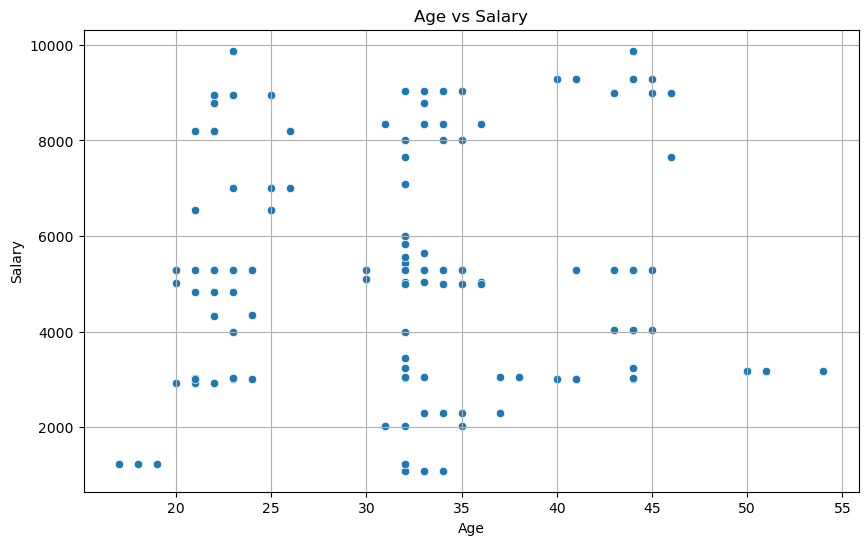

In [31]:
# Plot a chart with age and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### 3.3 Count the number of people from each place and represent it visually

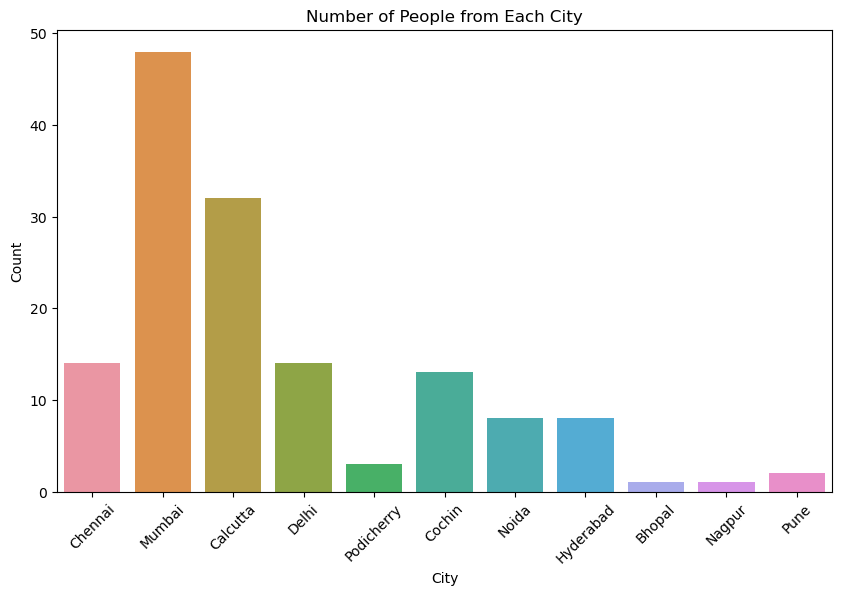

In [32]:
# Count the number of people from each place and represent it visually
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=data)
plt.title('Number of People from Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

## Step 4: Data Encoding

### 4.1 One-hot encoding,

#### A).Get_dummies() function 

In [33]:
import numpy as np

In [34]:
# Usethe get_dummies() function from pandas to perform one-hot encoding on categorical variable
one_hot_encoded_data=pd.get_dummies(data=data,columns = ['Company','City','Country'])
one_hot_encoded_data

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,City_Bhopal,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune,Country_India
0,20.0,5283.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,30.0,5283.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,35.0,2300.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,40.0,3000.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,23.0,4000.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
140,33.0,9024.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
141,44.0,4034.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
142,33.0,5034.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


###### Each unique value in the 'Company','City','Country' columns has been converted into a new binary column.

#### B).OneHotEncoding

In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Specifies the columns to be one-hot encoded.
columns_to_encode=['Company','City','Country']

In [37]:
# Initializes an empty list to store the new column names generated after encoding.
new_encoded_columns_names= []

In [38]:
# Create a list of new columns names
# For each unique category in the column,it generates a new column name following the format "is_{category}"
for col in columns_to_encode:
    new_encoded_columns_names+=[f"is_{category}" for category in data[col].unique().tolist()]
    

In [39]:
print(new_encoded_columns_names)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']


In [40]:
# Initialize and fit Oe Hot Encoder class from sklearn
one_hot_encoder=OneHotEncoder(sparse_output = 0, handle_unknown = 'ignore')

In [41]:
# Fits the OneHotEncoder to the specified columns (columns_to_encode) in the DataFrame and transforms these columns into a one-hot encoded representation
encoded_columns = one_hot_encoder.fit_transform(data[columns_to_encode])
encoded_columns

C:\Users\Windows10\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [42]:
#as the output of the above transformer would be a sparse matrix,we need to convert it back to pandas dataframe
data_encoded=pd.DataFrame(encoded_columns,columns= new_encoded_columns_names )
data_encoded

,is_TCS,is_Infosys,is_CTS,is_Congnizant,is_Chennai,is_Mumbai,is_Calcutta,is_Delhi,is_Podicherry,is_Cochin,is_Noida,is_Hyderabad,is_Bhopal,is_Nagpur,is_Pune,is_India
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 4.2 Label encoding


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
#label_encoder is the object of LabelEncoder class
label_encoder= LabelEncoder()
for i in data:
    data[i]=label_encoder.fit_transform(data[i])
data    

,Company,Age,Salary,City,Country,Gender
0,3,3,21,2,0,0
1,2,10,21,6,0,0
2,3,15,3,1,0,0
3,2,19,5,4,0,0
4,3,6,12,6,0,0
...,...,...,...,...,...,...
139,2,5,33,6,0,0
140,3,13,38,1,0,1
141,2,22,13,4,0,1
142,3,13,19,6,0,1


## Step 5: Feature Scaling

### 5.1 StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# Create a scaler object
scaler=StandardScaler()

In [47]:
# Fit the scaler on the data
scaler.fit(data)

StandardScaler()

In [48]:
#Transform the data
scaled_data=scaler.transform(data)
print(scaled_data)

[[ 0.9000463  -1.51076223  0.13960436 -0.89325451  0.         -0.53452248]
 [ 0.05844457 -0.39756901  0.13960436  0.7505621   0.         -0.53452248]
 [ 0.9000463   0.39756901 -1.36812276 -1.30420866  0.         -0.53452248]
 [ 0.05844457  1.03367942 -1.20059753 -0.07134621  0.         -0.53452248]
 [ 0.9000463  -1.03367942 -0.6142592   0.7505621   0.         -0.53452248]
 [ 0.05844457 -0.0795138  -0.19544611 -1.30420866  0.         -0.53452248]
 [ 0.9000463  -0.0795138   0.55841745 -0.89325451  0.          1.87082869]
 [ 0.05844457 -1.03367942  0.80970531  0.7505621   0.          1.87082869]
 [ 0.9000463   0.23854141  1.06099316 -1.30420866  0.          1.87082869]
 [-1.62475891  1.66978984  1.47980625 -0.07134621  0.         -0.53452248]
 [-1.62475891 -1.03367942  0.13960436  0.7505621   0.         -0.53452248]
 [-1.62475891  0.23854141 -1.61941062 -1.30420866  0.         -0.53452248]
 [-1.62475891  1.66978984  0.13960436 -0.89325451  0.         -0.53452248]
 [-1.62475891 -1.82881744

### 5.2 Minmaxscaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Create a scaler object
scaler=MinMaxScaler()

In [51]:
# Fit the scaler on the data
scaler.fit(data)

MinMaxScaler()

In [52]:
#Transform the data
scaled_data=scaler.transform(data)
print(scaled_data)

[[1.         0.11111111 0.525      0.2        0.         0.        ]
 [0.66666667 0.37037037 0.525      0.6        0.         0.        ]
 [1.         0.55555556 0.075      0.1        0.         0.        ]
 [0.66666667 0.7037037  0.125      0.4        0.         0.        ]
 [1.         0.22222222 0.3        0.6        0.         0.        ]
 [0.66666667 0.44444444 0.425      0.1        0.         0.        ]
 [1.         0.44444444 0.65       0.2        0.         1.        ]
 [0.66666667 0.22222222 0.725      0.6        0.         1.        ]
 [1.         0.51851852 0.8        0.1        0.         1.        ]
 [0.         0.85185185 0.925      0.4        0.         0.        ]
 [0.         0.22222222 0.525      0.6        0.         0.        ]
 [0.         0.51851852 0.         0.1        0.         0.        ]
 [0.         0.85185185 0.525      0.2        0.         0.        ]
 [0.         0.03703704 0.025      0.6        0.         0.        ]
 [0.66666667 0.7037037  0.125     